In [1]:
# data set can be found at https://www.kaggle.com/usdot/flight-delays#flights.csv
import pandas as pd
%matplotlib inline
import datetime, warnings, scipy 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
# data cleaning
rawData = pd.read_csv("flights.csv", low_memory=False)
df = rawData.drop_duplicates() # drop duplicate entries
df = rawData.reset_index(drop = True) # reset index if any entries were dropped
df = rawData[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'CANCELLED','DEPARTURE_DELAY']] # dataframe with only necessary columns
cancelled = df[df['DEPARTURE_DELAY'].isnull()] # creating data frame with flights that were cancelled
delayed = df[df['DEPARTURE_DELAY'] != 0 & df['DEPARTURE_DELAY'].notnull()] # creating data frame with flights that were delayed

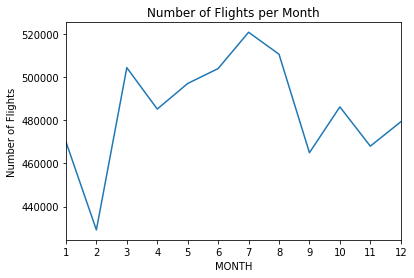

7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: MONTH, dtype: int64


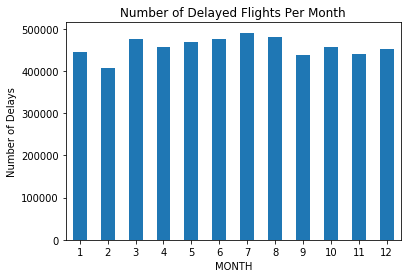

7     490877
8     480665
3     475937
6     475547
5     469374
4     458155
10    456430
12    451353
1     445683
11    440488
9     438408
2     406802
Name: MONTH, dtype: int64


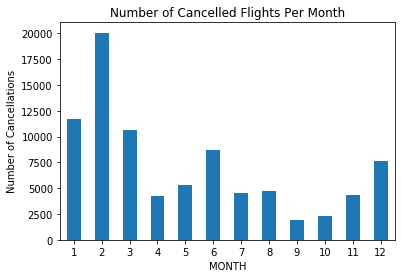

2     20059
1     11657
3     10639
6      8698
12     7679
5      5336
8      4719
7      4507
11     4339
4      4253
10     2339
9      1928
Name: MONTH, dtype: int64


In [3]:
# number of flights per month
month = df.groupby(['MONTH']).size()
month.plot.line(rot = 360)
plt.xticks(np.arange(1,13))
plt.title('Number of Flights per Month')
plt.ylabel('Number of Flights')
plt.show()
print(df['MONTH'].value_counts())
# number of delays per month
monthDelay = delayed.groupby(['MONTH']).size()
monthDelay.plot.bar(rot = 360)
plt.title('Number of Delayed Flights Per Month')
plt.ylabel('Number of Delays')
plt.show()
print(delayed['MONTH'].value_counts())
# number of cancallations per month
monthCancel = cancelled.groupby(['MONTH']).size()
monthCancel.plot.bar(rot = 360)
plt.title('Number of Cancelled Flights Per Month')
plt.ylabel('Number of Cancellations')
plt.show()
print(cancelled['MONTH'].value_counts())

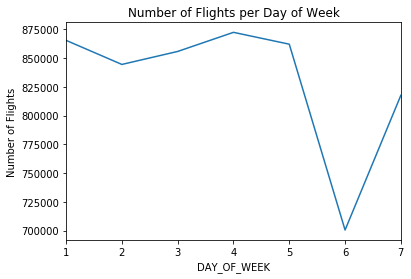

4    872521
1    865543
5    862209
3    855897
2    844600
7    817764
6    700545
Name: DAY_OF_WEEK, dtype: int64


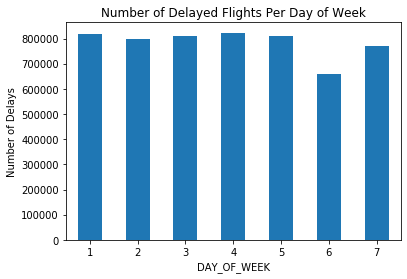

4    822663
1    816401
5    811637
3    808415
2    798613
7    771144
6    660846
Name: DAY_OF_WEEK, dtype: int64


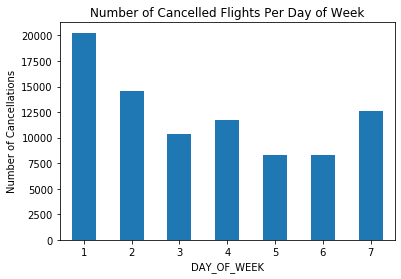

1    20255
2    14609
7    12617
4    11741
3    10314
5     8325
6     8292
Name: DAY_OF_WEEK, dtype: int64


In [4]:
# number of flights per day of the week
day = df.groupby(['DAY_OF_WEEK']).size()
day.plot.line(rot = 360)
plt.xticks(np.arange(1,8))
plt.title('Number of Flights per Day of Week')
plt.ylabel('Number of Flights')
plt.show()
print(df['DAY_OF_WEEK'].value_counts())
# number of delays per day of the week
dayofweekDelay = delayed.groupby(['DAY_OF_WEEK']).size()
dayofweekDelay.plot.bar(rot = 360)
plt.title('Number of Delayed Flights Per Day of Week')
plt.ylabel('Number of Delays')
plt.show()
print(delayed['DAY_OF_WEEK'].value_counts())
# number of cancallations per day of the week
dayofweekCancel = cancelled.groupby(['DAY_OF_WEEK']).size()
dayofweekCancel.plot.bar(rot = 360)
plt.title('Number of Cancelled Flights Per Day of Week')
plt.ylabel('Number of Cancellations')
plt.show()
print(cancelled['DAY_OF_WEEK'].value_counts())

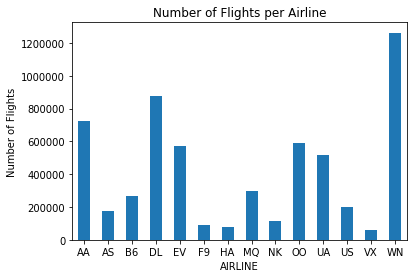

WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64


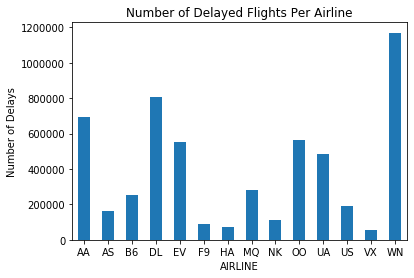

WN    1170316
DL     808748
AA     692329
OO     561209
EV     550173
UA     487593
MQ     279588
B6     253426
US     189487
AS     165430
NK     112677
F9      87583
HA      73140
VX      58020
Name: AIRLINE, dtype: int64


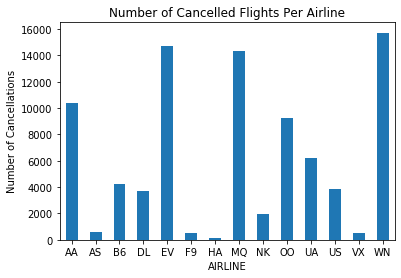

WN    15726
EV    14683
MQ    14350
AA    10386
OO     9267
UA     6189
B6     4205
US     3890
DL     3704
NK     1925
AS      611
F9      546
VX      518
HA      153
Name: AIRLINE, dtype: int64


In [5]:
# number of flights per airline
airline = df.groupby(['AIRLINE']).size()
airline.plot.bar(rot = 360)
plt.title('Number of Flights per Airline')
plt.ylabel('Number of Flights')
plt.show()
print(df['AIRLINE'].value_counts())
# number of delays per airline
airlineDelay = delayed.groupby(['AIRLINE']).size()
airlineDelay.plot.bar(rot = 360)
plt.title('Number of Delayed Flights Per Airline')
plt.ylabel('Number of Delays')
plt.show()
print(delayed['AIRLINE'].value_counts())
# number of cancallations per airline
airlineCancel = cancelled.groupby(['AIRLINE']).size()
airlineCancel.plot.bar(rot = 360)
plt.title('Number of Cancelled Flights Per Airline')
plt.ylabel('Number of Cancellations')
plt.show()
print(cancelled['AIRLINE'].value_counts())

In [6]:
# machine learning

# Select only desired columns from data
flights = rawData[['DISTANCE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY','SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DIVERTED']]
flights = flights.dropna()
X = flights.drop('ARRIVAL_DELAY',axis = 1)
y = flights['ARRIVAL_DELAY']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)
sc1 = StandardScaler()
X_train_sc = sc1.fit_transform(X_train)
X_test_sc = sc1.transform(X_test)

Linear Regression
Error: 1.166724019783705e-06
R: 0.9999999984709158


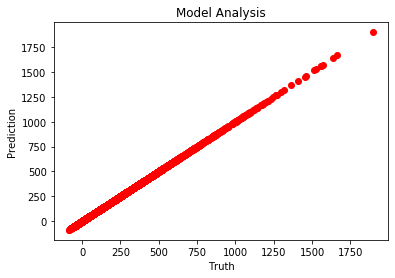

In [7]:
# Linear regression model
linearR = LinearRegression()
print("Linear Regression")
model1 = linearR.fit(X_train_sc, y_train)
Y_predict = model1.predict(X_test_sc)
print('Error:', mean_absolute_error(y_test, Y_predict))
print('R:', r2_score(y_test, Y_predict))
plt.scatter(y_test, Y_predict, color = 'r')
plt.title("Model Analysis")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()

Decision Tree
Error: 0.3483000554776768
R: 0.9986301932940718


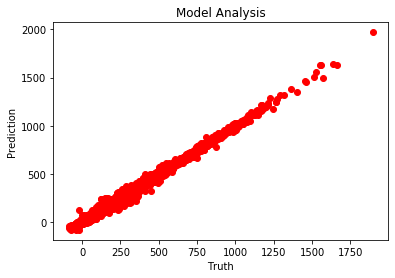

In [8]:
# Decision tree regressor model
decisionT = DecisionTreeRegressor(random_state = 2)
print("Decision Tree")
model2 = decisionT.fit(X_train_sc, y_train)
Y_predict = model2.predict(X_test_sc)
print('Error:', mean_absolute_error(y_test, Y_predict))
print('R:', r2_score(y_test, Y_predict))
plt.scatter(y_test, Y_predict, color = 'r')
plt.title("Model Analysis")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()